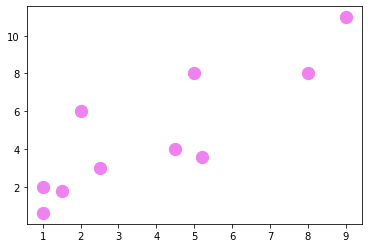

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from random import sample

import numpy as np
import math

%matplotlib inline

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [5.2,3.6],
              [4.5,4],
              [2,6],
              [2.5,3]])

plt.scatter(X[:,0], X[:,1], s=150, color = 'violet')
plt.show()

In [2]:
def initializeCenters(df, k):
    random_indices = sample(range(len(df)), k)
    print(random_indices)
    centres = []
    for i in range(k):
        centres.append(df[random_indices[i]])
    print("Random Indices : " + str(random_indices))
    return centres

In [3]:
def euclidean_distance(x, y):
    sum_ = 0
    for i in range(len(x)):
        term = (x[i] - y[i])**2
        sum_ += term
    return math.sqrt(sum_)

In [4]:
def assignCluster(df, k, cluster_centres):
    cluster_assigned = []
    for i in range(len(df)):
        distances = [euclidean_distance(df[i], centre) for centre in cluster_centres]
        min_dist, idx = min((val, idx) for (idx, val) in enumerate(distances))
        cluster_assigned.append(idx)
    return cluster_assigned

In [5]:
def computeCenter(df, k, cluster_labels):
    new_centres = []

    for i in range(k):
        data_points = []
        for j in range(len(df)):
            if(cluster_labels[j] == i):
                data_points.append(df[j]) 
        print('Cluster{}'.format(i),data_points)
        avg = [float(sum(col))/len(col) for col in zip(*data_points)]
        avg = np.asarray(avg)
        new_centres.append(avg)
#         print(avg)

    return new_centres

In [6]:
def kmeans(df, k, centres):
    curr = 1
    MAX_ITER = 300
    while curr <= MAX_ITER:
        cluster_labels = assignCluster(df, k, centres)
        prev_centres = centres
        print (cluster_labels)
        centres = computeCenter(df, k, cluster_labels)
        print('New: ', centres)
        curr += 1
    return centres, cluster_labels


In [7]:
k=2
centres = initializeCenters(X,k)
cluster_labels = []
print ('INITIAL:',centres)
centres, cluster_labels = kmeans(X,k,centres)



[0, 2]
Random Indices : [0, 2]
INITIAL: [array([1., 2.]), array([5., 8.])]
[0, 0, 1, 1, 0, 1, 1, 0, 1, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([4.5, 4. ]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.]), array([5.2, 3.6]), array([2., 6.])]
New:  [array([2.1 , 2.28]), array([5.84, 7.32])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]


Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6])

Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.52857143, 3.        ]), array([7.33333333, 9.        ])]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Cluster0 [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6]), array([5.2, 3.6]), array([4.5, 4. ]), array([2., 6.]), array([2.5, 3. ])]
Cluster1 [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]
New:  [array([2.528

In [8]:
centres = np.asarray(centres)
cluster_labels = np.asarray(cluster_labels)

print('FINAL CENTRES: ', centres)
print('CLUSTER LABELS: ', cluster_labels)

FINAL CENTRES:  [[2.52857143 3.        ]
 [7.33333333 9.        ]]
CLUSTER LABELS:  [0 0 1 1 0 1 0 0 0 0]


In [9]:
colors = ['red','blue']

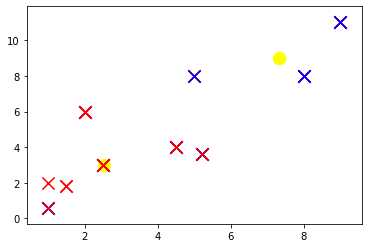

In [10]:
for i in range(len(centres)):
    plt.scatter(centres[i:,0], centres[i:,1], s=150, marker='o', color='yellow')
    
for i in range(len(X)):
    color_point = colors[cluster_labels[i]]
    plt.scatter(X[i:,0], X[i:,1], s=150, marker='x',color=color_point)

plt.show()